Data: Impacts of hurricanes across the Yucatan Peninsula since 1851

Citation: Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2024-10-24).

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469", parse_dates = ["start.date", "end.date"])

In [3]:
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [4]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?

In [5]:
# Clean column names
df.columns = (df.columns
                  .str.replace('.','_'))

/tmp/ipykernel_1852974/1573393161.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = (df.columns


In [10]:
cat_5 = df[df['ss'] == 5].copy()
cat_5.shape

(4, 8)

Only 4 category 5 hurricanes have been registered

In [7]:
cat_5

,code,start_date,end_date,number,name,ss,track,rf_max
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [11]:
cat_5['duration'] = (cat_5['end_date'] - cat_5['start_date'])

In [12]:
cat_5

,code,start_date,end_date,number,name,ss,track,rf_max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [13]:
# Collect code - final workflow
import pandas as pd

# Read in data
df = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469", parse_dates = ["start.date", "end.date"])

(df.loc[df['ss'] == 5]
    .assign(duration = pd.to_datetime(df['end.date']) - pd.to_datetime(df['start.date']))
     [['name', 'ss', 'duration']]
)

,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


Text(0.5, 1.0, 'Start date vs Saffir Scale')

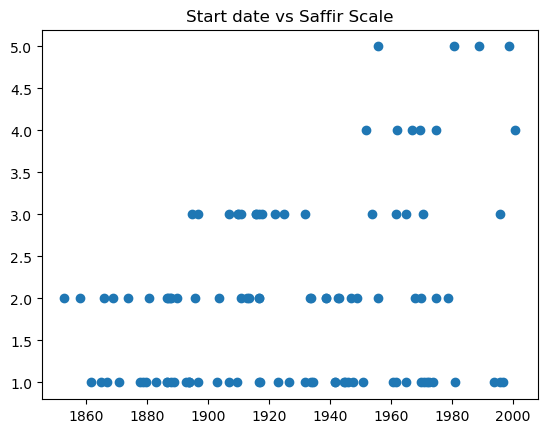

In [18]:
# Cat's way:

(df.loc[df['ss'] == 5]
    .assign(duration = pd.to_datetime(df['end.date']) - pd.to_datetime(df['start.date']))
     [['name', 'ss', 'duration']]
)

plt.figure
plt.scatter(pd.to_datetime(df['start.date']), df['ss'])
plt.title("Start date vs Saffir Scale")
plt.xlabel(" ")
ax.set
